In [1]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 4.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import patoolib
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import seaborn as sns
import imageio
from sklearn.metrics import accuracy_score
import pandas as pd


In [3]:
patoolib.extract_archive('/content/Data.zip')

patool: Extracting /content/Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_oank_zid -- /content/Data.zip
patool: ... /content/Data.zip extracted to `Data'.


'Data'

In [11]:
Path ="/content/Data/Train/"
Train = []
for i in range(1,2401): 
    im_path = Path + '{}.jpg'.format(i)
    im = imageio.imread(str(im_path))
    im_numpy = np.array(im)
    im_numpy_flatten = im_numpy.flatten().reshape(1,784)
    Train.append(im_numpy_flatten)	
Trainn = np.array(Train).reshape(2400,784)



function to get the mean

In [8]:
def mean_fun(list):
    mean_val = np.round((np.sum(list, axis = 0, keepdims = True))/(len(list)),decimals=8)
    return mean_val

In [9]:
#Separate classes
def seperate_class (Train):
	classList  = [Train[start:start+240] for start in range(0,len(Train),240)]
	return classList



#w = S−1(m − m ).



In [60]:
W0_All = []
W1_All = []
Class_a_list=[]
Class_b_list=[]  
M_a_list=[]
M_b_list=[]
S_a = np.zeros((784,784))
S_b = np.zeros((784,784))

data_whole_list = seperate_class(Trainn)

for i in range(10):

    Class_a = data_whole_list[i]
    Class_a_list.append(Class_a)
   #get the mean 
    M_a = mean_fun(Class_a_list[i])
    M_a_list.append(M_a)
    
    CL_b = [value for index,value in enumerate(data_whole_list) if index!= i]
    CL_b_array=np.array(CL_b).reshape(2160,784)
    Class_b_list.append(CL_b_array)
       
    M_b = mean_fun(Class_b_list[i])
    M_b_list.append(M_b)
    

  

get the sw

Sw = S_a + S_b



s a,b= (m2-m1)(m2-m1)T

sw-1

In [61]:
for i in range(10):
    S_a = S_a + np.dot((np.subtract(Class_a_list[i], M_a_list[i])).T.reshape(784,240), np.subtract(Class_a_list[i], M_a_list[i]).reshape(240,784))
    S_b = S_b + np.dot((np.subtract(Class_b_list[i], M_b_list[i])).T.reshape(784,2160), np.subtract(Class_b_list[i],M_b_list[i]).reshape(2160,784))

    Sw = S_a + S_b
    Sw_inv = np.linalg.pinv(Sw)
    

    
    W1 = np.dot(Sw_inv,(np.subtract(M_b_list[i],M_a_list[i]).T))
    W1_All.append(W1)
    W0 = -.5 * np.dot(sum(M_a_list[i], M_b_list[i]),np.array(W1))
    W0_All.append(W0)

#examine Fisher’s Linear Discriminant without including the bais term

In [47]:
resultLabels = np.ones([200])


for i in range(200):
    curri = i+1
    newpath = '/content/Data/Test/' + str(curri) + ".jpg"
    img = Image.open(newpath)
    image = np.asarray(img).flatten()
    
    outputWeights = np.zeros([10])
    predictions = []
    for j in range(10):
      
      testing = (np.dot(image,W1_All[j]))
      predictions.append(testing)

    minElement = np.argmin(predictions)
    resultLabels[i] = minElement

In [48]:
originalLabels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
originalLabels.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [49]:
accuracy_score(originalLabels,resultLabels)

0.65

In [50]:
def confusionMat(original, result):
    cm = np.zeros([10, 10])
    for i in range(len(original)):
        cm[int(original[i])][int(result[i])] += 1
        
    return cm.astype(int)

In [51]:
cm = confusionMat(originalLabels, resultLabels)
cm

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  2,  9,  1,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  1, 18,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  5, 12,  1,  0,  0,  0,  0],
       [ 7,  0,  0,  5,  0,  7,  1,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0, 17,  0,  0,  0],
       [ 5,  2,  2,  1,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  4,  4,  0,  1,  0,  0, 10,  0],
       [ 4,  0,  3,  3,  2,  0,  0,  1,  0,  7]])

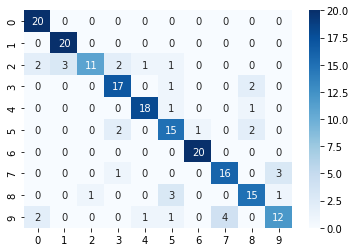

In [63]:

fig=sns.heatmap(cm, annot=True , cmap='Blues')

In [53]:
fig.figure.savefig("ConfusionNoBias.jpg")

#test with bais term

the accuracy with the bais is higher which effect the performance of the classifier . thus, it will perform better

In [54]:
resultLabels = np.ones([200])

for i in range(200):
    curri = i+1
    newpath = '/content/Data/Test/' + str(curri) + ".jpg"
    img = Image.open(newpath)
    image = np.asarray(img).flatten()
    
    outputWeights = np.zeros([10])
    predictions = []
    for j in range(10):
      
      testing = (np.dot(image,W1_All[j]))  + W0_All[j]
      predictions.append(testing)

    minElement = np.argmin(predictions)
    resultLabels[i] = minElement

In [55]:
originalLabels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
originalLabels.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [56]:
accuracy_score(originalLabels,resultLabels)

0.82

In [57]:
def confusionMat(original, result):
    cm = np.zeros([10, 10])
    for i in range(len(original)):
        cm[int(original[i])][int(result[i])] += 1
        
    return cm.astype(int)

In [58]:
cm = confusionMat(originalLabels, resultLabels)
cm

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3, 11,  2,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 18,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0, 15,  1,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 16,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 2,  0,  0,  0,  1,  1,  0,  4,  0, 12]])

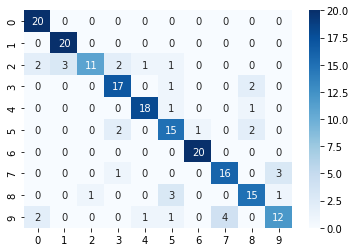

In [62]:

fig=sns.heatmap(cm, annot=True , cmap='Blues')

In [38]:
fig.figure.savefig("ConfusionWithBias.jpg")